In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

visits = pd.read_csv('/datasets/visits_info.csv') # посещение сайта
visits

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,01.05.2019 02:36,01.05.2019 02:45
1,278965908054,United States,iPhone,organic,01.05.2019 04:46,01.05.2019 04:47
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32
3,326433527971,United States,Android,TipTop,01.05.2019 00:29,01.05.2019 00:54
4,349773784594,United States,Mac,organic,01.05.2019 03:33,01.05.2019 03:57
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,31.10.2019 13:28,31.10.2019 14:39
309897,334903592310,France,PC,lambdaMediaAds,31.10.2019 22:14,31.10.2019 22:39
309898,540102010126,Germany,PC,organic,31.10.2019 01:40,31.10.2019 01:41
309899,308736936846,Germany,Mac,organic,31.10.2019 07:37,31.10.2019 07:37


In [2]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [3]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns = {'user id':'user_id','session start':'session_start','session end':'session_end'})
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [4]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,01.05.2019 02:36,01.05.2019 02:45
1,278965908054,United States,iPhone,organic,01.05.2019 04:46,01.05.2019 04:47
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32
3,326433527971,United States,Android,TipTop,01.05.2019 00:29,01.05.2019 00:54
4,349773784594,United States,Mac,organic,01.05.2019 03:33,01.05.2019 03:57


In [5]:
visits['session_start'] = visits['session_start'].map(lambda x: datetime.strptime(x, '%d.%m.%Y %H:%M'))

In [6]:
visits['session_end'] = visits['session_end'].map(lambda x: datetime.strptime(x, '%d.%m.%Y %H:%M'))

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null datetime64[ns]
session_end      309901 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [8]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:00,2019-05-01 02:45:00
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:00,2019-05-01 04:47:00
2,590706206550,United States,Mac,organic,2019-05-01 14:09:00,2019-05-01 15:32:00
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:00,2019-05-01 00:54:00
4,349773784594,United States,Mac,organic,2019-05-01 03:33:00,2019-05-01 03:57:00


In [9]:
visits.session_start.min()

Timestamp('2019-05-01 00:00:00')

In [10]:
visits.duplicated().sum()

0

In [11]:
orders = pd.read_csv('/datasets/orders_info.csv') # покупки
orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns = {'user id':'user_id','event dt':'event_dt'})
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [14]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null datetime64[ns]
revenue     40212 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [15]:
orders.duplicated().sum()

0

In [16]:
orders['event_dt'].min()

Timestamp('2019-05-01 00:28:11')

In [17]:
costs = pd.read_csv('/datasets/costs_info.csv') # расх на рекламу
costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [19]:
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [20]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null datetime64[ns]
channel    1800 non-null object
costs      1800 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [21]:
costs.duplicated().sum()

0

### Вывод
Загружены 3 датасета о посещениях сайта, покупках, расходах на рекламу. Дубликатов в файлах нет.
Названия столбцов приведены к нижнему регистру и переименованы должным образом. Даты приведены к нужному типу данных - datetime, остальные данные загружены в нужном формате.

# Шаг 2. Проведение исследовательского анализа данных

Построение профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.

Выяснить:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [22]:
costs['dt'] = costs['dt'].dt.date

In [23]:
# добавляем параметр ad_costs — траты на рекламу
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC


In [24]:
profiles = get_profiles(visits, orders, costs, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:00,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:00,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:00,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:00,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:00,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:00,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:00,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:00,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [25]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:00')

In [26]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:00')

In [27]:
region_pay = profiles.query('payer == True').groupby('region').agg({'user_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
region_pay

,user_id
region,
United States,6902
UK,700
France,663
Germany,616


In [28]:
region = profiles.groupby('region').agg({'user_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
region

,user_id
region,
United States,100002
UK,17575
France,17450
Germany,14981


In [29]:
total_1 = region.merge(region_pay, on = 'region').rename(columns={'user_id_x': 'sum_total','user_id_y':'sum_pay'})
total_1['%'] = total_1['sum_pay'] / total_1['sum_total'] * 100
total_1

,sum_total,sum_pay,%
region,,,
United States,100002,6902,6.901862
UK,17575,700,3.982930
France,17450,663,3.799427
Germany,14981,616,4.111875


In [30]:
device_pay = profiles.query('payer == True').groupby('device').agg({'user_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
device_pay

,user_id
device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


In [31]:
device = profiles.groupby('device').agg({'user_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
device

,user_id
device,
iPhone,54479
Android,35032
PC,30455
Mac,30042


In [32]:
total_2 = device.merge(device_pay, on = 'device').rename(columns={'user_id_x': 'sum_total','user_id_y':'sum_pay'})
total_2['%'] = total_2['sum_pay'] / total_2['sum_total'] * 100
total_2

,sum_total,sum_pay,%
device,,,
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790
Mac,30042,1912,6.364423


In [33]:
channel_pay = profiles.query('payer == True').groupby('channel').agg({'user_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
channel_pay

,user_id
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


In [34]:
channel = profiles.groupby('channel').agg({'user_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
channel

,user_id
channel,
organic,56439
FaceBoom,29144
TipTop,19561
OppleCreativeMedia,8605
LeapBob,8553
WahooNetBanner,8553
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


In [35]:
total_3 = channel.merge(channel_pay, on = 'channel').rename(columns={'user_id_x': 'sum_total','user_id_y':'sum_pay'})
total_3['%'] = total_3['sum_pay'] / total_3['sum_total'] * 100
total_3

,sum_total,sum_pay,%
channel,,,
organic,56439,1160,2.055316
FaceBoom,29144,3557,12.204914
TipTop,19561,1878,9.600736
OppleCreativeMedia,8605,233,2.707728
LeapBob,8553,262,3.063253
WahooNetBanner,8553,453,5.296387
RocketSuperAds,4448,352,7.913669
MediaTornado,4364,156,3.574702
YRabbit,4312,165,3.826531


### Вывод
Мин дата привлечения - 2019-05-01, макс дата привлечения 2019-10-27.

Больше всего платящих пользователей приходит из United States - почти 7 %, чаще вего платят с Mac - 6,4 %, источник привлечения чаще всего это FaceBoom - так же 12,2 % платящих пользователей.

# Шаг 3. Построение отчёта и вычисление метрик
Продукт:

-    Сколько людей пользуются в день, неделю, месяц?
-    Сколько сессий в день?
-    Сколько длится одна сессия?

Продажи:

- Когда люди начинают покупать?
- Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день?
- Какой средний чек за месяц, неделю, день?

Маркетинг:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Продукт:
-    Сколько людей пользуются в день, неделю, месяц?

In [36]:
profiles['session_year'] = profiles['first_ts'].dt.year
profiles['session_month'] = profiles['first_ts'].dt.month
profiles['session_week'] = profiles['first_ts'].dt.week
profiles['session_date'] = profiles['first_ts'].dt.date
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,session_year,session_month,session_week,session_date
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019,5,19,2019-05-07
1,4919697,2019-07-09 12:46:00,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,2019,7,28,2019-07-09
2,6085896,2019-10-01 09:58:00,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,2019,10,40,2019-10-01
3,22593348,2019-08-22 21:35:00,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,2019,8,34,2019-08-22
4,31989216,2019-10-02 00:07:00,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,2019,10,40,2019-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:00,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000,2019,9,39,2019-09-28
150004,999975439887,2019-10-21 00:35:00,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000,2019,10,43,2019-10-21
150005,999976332130,2019-07-23 02:57:00,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000,2019,7,30,2019-07-23
150006,999979924135,2019-09-28 21:28:00,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714,2019,9,39,2019-09-28


In [37]:
dau1 = profiles.groupby('session_date').agg({'user_id': 'nunique'}) # сколько людей пользуются приложеним в день
dau1

,user_id
session_date,
2019-05-01,909
2019-05-02,758
2019-05-03,849
2019-05-04,1015
2019-05-05,970
...,...
2019-10-23,739
2019-10-24,940
2019-10-25,1021


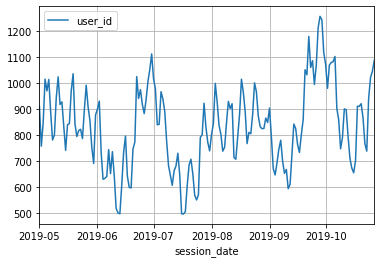

In [38]:
dau1.plot(grid = True)

На графике изображено изменение dau во времени. Видно, что за день, кол-во людей, которые пользуются приложением, постоянно меняется. Динамика по кол-ву пользователей все время примерно на одном уровне.

In [39]:
wau1 = profiles.groupby('session_week').agg({'user_id': 'nunique'}) # сколько людей пользуются приложеним в неделю
wau1

,user_id
session_week,
18,4501
19,6372
20,6195
21,5955
22,5919
23,4776
24,4305
25,5329
26,6882


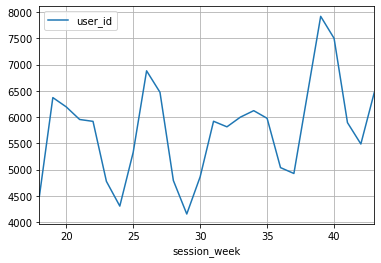

In [40]:
wau1.plot(grid = True)

На графике изображено изменение wau во времени. Видно, что за неделю, кол-во людей, которые пользуются приложением, нестабильно, однако более стабильный график, чем выше dau.

In [41]:
mau1 = profiles.groupby('session_month').agg({'user_id': 'nunique'}) # сколько людей пользуются приложеним в месяц
mau1

,user_id
session_month,
5,27111
6,23123
7,22627
8,26586
9,26327
10,24234


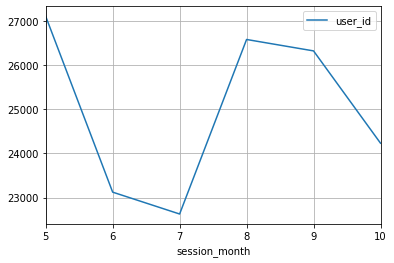

In [42]:
mau1.plot(grid = True)

На графике изображено изменение mau во времени. Видно, что за месяц, кол-во людей, которые пользуются приложением, очень нестабильно. Сначала упало, потом пошло наверх. К концу года опять упало.

In [43]:
dau = dau1.mean()
wau = wau1.mean()
mau = mau1.mean()

In [44]:
dau, wau, mau

(user_id    833.377778
 dtype: float64,
 user_id    5769.538462
 dtype: float64,
 user_id    25001.333333
 dtype: float64)

-    Сколько длится одна сессия?

In [45]:
visits['sec_dur']= (visits['session_end'] - visits['session_start']).dt.seconds
visits

,user_id,region,device,channel,session_start,session_end,sec_dur
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:00,2019-05-01 02:45:00,540
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:00,2019-05-01 04:47:00,60
2,590706206550,United States,Mac,organic,2019-05-01 14:09:00,2019-05-01 15:32:00,4980
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:00,2019-05-01 00:54:00,1500
4,349773784594,United States,Mac,organic,2019-05-01 03:33:00,2019-05-01 03:57:00,1440
...,...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:00,2019-10-31 14:39:00,4260
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:00,2019-10-31 22:39:00,1500
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:00,2019-10-31 01:41:00,60
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:00,2019-10-31 07:37:00,0


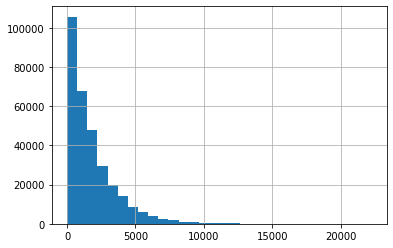

In [46]:
visits['sec_dur'].hist(bins = 30) # распределение длительности сессий

Распределение длительности сессий распредено по экспоненц закону.

In [47]:
visits['sec_dur'].median()

1260.0

-     Сколько сессий в день?

In [48]:
visits['session_start'] = visits['session_start'].dt.date

In [49]:
visits_day = visits.groupby('session_start').agg({'user_id':'count'})
visits_day

,user_id
session_start,
2019-05-01,909
2019-05-02,1026
2019-05-03,1170
2019-05-04,1429
2019-05-05,1463
...,...
2019-10-27,2265
2019-10-28,1155
2019-10-29,1005


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79b4b4abd0>]],
      dtype=object)

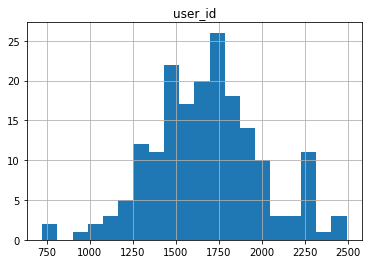

In [50]:
visits_day.hist(bins = 20) # общее число сессий в день

Общее число пользователей в день распредено по нормально закону, однако колокол не совсем гладкий.

In [51]:
visits_day.median() # среднее кол-во сессий в день

user_id    1682.0
dtype: float64

### Вывод
Были посчитаны метрики по направлению *продукт*.

1) Посчитано, сколько людей пользуются приложением в день, неделю и месяц.

Среднеие: dau = 834, wau = 5770, mau = 25002.
Построены изменения метрик во времени.

2) Среднее число сессий в день 1682. Построена гистограмма, отражающую распределение общего числа сессий в день.

3) Одна сессия в среднем длится 1260 сек, что равно 21 минуте. Построена гистограмма, отражающую распределение длительности сессий. 


### Продажи:

- Когда люди начинают покупать?

In [52]:
a1 = orders.merge(profiles)
a1

,user_id,event_dt,revenue,first_ts,channel,device,region,dt,month,payer,acquisition_cost,session_year,session_month,session_week,session_date
0,188246423999,2019-05-01 23:09:52,4.99,2019-05-01 23:09:00,FaceBoom,Android,United States,2019-05-01,2019-05-01,True,1.089423,2019,5,18,2019-05-01
1,174361394180,2019-05-01 12:24:04,4.99,2019-05-01 12:23:00,RocketSuperAds,iPhone,United States,2019-05-01,2019-05-01,True,0.540000,2019,5,18,2019-05-01
2,174361394180,2019-05-03 09:42:08,4.99,2019-05-01 12:23:00,RocketSuperAds,iPhone,United States,2019-05-01,2019-05-01,True,0.540000,2019,5,18,2019-05-01
3,174361394180,2019-05-13 10:41:29,4.99,2019-05-01 12:23:00,RocketSuperAds,iPhone,United States,2019-05-01,2019-05-01,True,0.540000,2019,5,18,2019-05-01
4,174361394180,2019-05-28 19:33:56,4.99,2019-05-01 12:23:00,RocketSuperAds,iPhone,United States,2019-05-01,2019-05-01,True,0.540000,2019,5,18,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40207,136940622331,2019-10-30 22:35:59,4.99,2019-10-27 03:29:00,AdNonSense,Android,France,2019-10-27,2019-10-01,True,1.020000,2019,10,43,2019-10-27
40208,832315238087,2019-10-31 08:31:01,4.99,2019-10-12 17:47:00,LeapBob,Android,UK,2019-10-12,2019-10-01,True,0.221250,2019,10,41,2019-10-12
40209,492983055500,2019-10-31 10:43:57,4.99,2019-10-14 08:42:00,WahooNetBanner,PC,France,2019-10-14,2019-10-01,True,0.612000,2019,10,42,2019-10-14
40210,651604369137,2019-10-31 16:19:07,4.99,2019-10-25 23:05:00,lambdaMediaAds,iPhone,France,2019-10-25,2019-10-01,True,0.733333,2019,10,43,2019-10-25


In [53]:
a1_t = (a1['event_dt'] - a1['first_ts']).dt.seconds
a1_t.mean()

37179.0153934149

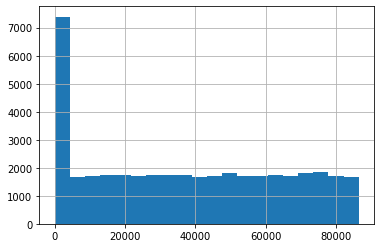

In [54]:
a1_t.hist(bins = 20)

Как видно из графика выше, много пользоателей начинают покупать, потратив меньше часа. Однако есть и те пользователи, у которых времени от начала посещения сайта до покупок составляет бОльшее значение.

- Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день?

In [55]:
orders['event_date'] = orders['event_dt'].dt.date
orders['event_week'] = orders['event_dt'].dt.week
orders['event_month'] = orders['event_dt'].dt.month

In [56]:
orders

,user_id,event_dt,revenue,event_date,event_week,event_month
0,188246423999,2019-05-01 23:09:52,4.99,2019-05-01,18,5
1,174361394180,2019-05-01 12:24:04,4.99,2019-05-01,18,5
2,529610067795,2019-05-01 11:34:04,4.99,2019-05-01,18,5
3,319939546352,2019-05-01 15:34:40,4.99,2019-05-01,18,5
4,366000285810,2019-05-01 13:59:51,4.99,2019-05-01,18,5
...,...,...,...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99,2019-10-31,44,10
40208,275341387049,2019-10-31 01:17:17,4.99,2019-10-31,44,10
40209,374656616484,2019-10-31 06:17:29,4.99,2019-10-31,44,10
40210,168548862926,2019-10-31 22:46:19,4.99,2019-10-31,44,10


In [57]:
# сколько покупают в день в среднем
for_day = orders.groupby(['user_id', 'event_date']).agg({'event_dt': 'count'}).reset_index().groupby('event_date').agg({'event_dt': 'mean'})
for_day

,event_dt
event_date,
2019-05-01,1.0
2019-05-02,1.0
2019-05-03,1.0
2019-05-04,1.0
2019-05-05,1.0
...,...
2019-10-27,1.0
2019-10-28,1.0
2019-10-29,1.0


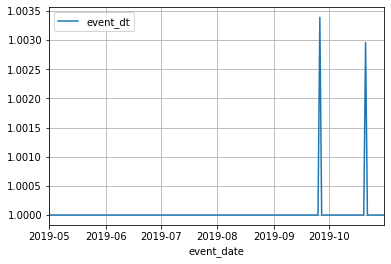

In [58]:
for_day.plot(grid = True)

Как видно из графика, кол-во покупок за день в среднем = 1.

In [59]:
for_day.mean()

event_dt    1.000035
dtype: float64

In [60]:
# сколько покупают в неделю в среднем
for_week = orders.groupby(['user_id', 'event_week']).agg({'event_dt': 'count'}).reset_index().groupby('event_week').agg({'event_dt': 'mean'})
for_week

,event_dt
event_week,
18,1.358974
19,1.526882
20,1.515021
21,1.407666
22,1.406877
23,1.402490
24,1.332474
25,1.380952
26,1.314796


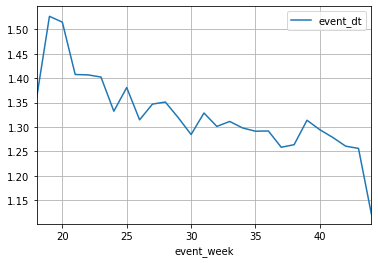

In [61]:
for_week.plot(grid = True)

Как видно из графика, среднее кол-во покупок за неделю убывает и чуть больше 1.

In [62]:
for_week.mean()

event_dt    1.326663
dtype: float64

In [63]:
# сколько покупают в месяц в среднем
for_month = orders.groupby(['user_id', 'event_month']).agg({'event_dt': 'count'}).reset_index().groupby('event_month').agg({'event_dt': 'mean'})
for_month

,event_dt
event_month,
5,2.415987
6,2.288732
7,2.340593
8,2.181243
9,2.044132
10,2.100000


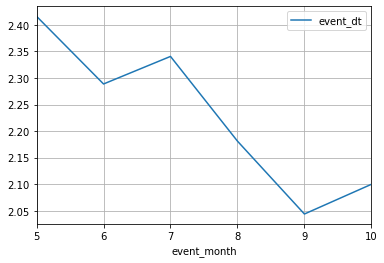

In [64]:
for_month.plot(grid = True)

Как видно из графика, кол-во покупок за месяц нестабильно, но в среднем чуть больше 2.

In [65]:
for_month.mean()

event_dt    2.228448
dtype: float64

- Какой средний чек за месяц, неделю, день?

In [66]:
orders

,user_id,event_dt,revenue,event_date,event_week,event_month
0,188246423999,2019-05-01 23:09:52,4.99,2019-05-01,18,5
1,174361394180,2019-05-01 12:24:04,4.99,2019-05-01,18,5
2,529610067795,2019-05-01 11:34:04,4.99,2019-05-01,18,5
3,319939546352,2019-05-01 15:34:40,4.99,2019-05-01,18,5
4,366000285810,2019-05-01 13:59:51,4.99,2019-05-01,18,5
...,...,...,...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99,2019-10-31,44,10
40208,275341387049,2019-10-31 01:17:17,4.99,2019-10-31,44,10
40209,374656616484,2019-10-31 06:17:29,4.99,2019-10-31,44,10
40210,168548862926,2019-10-31 22:46:19,4.99,2019-10-31,44,10


In [67]:
sales_day = orders.groupby('event_date').agg({'revenue': 'mean'}) # на сколько покупают в день
sales_day

,revenue
event_date,
2019-05-01,5.030000
2019-05-02,4.990000
2019-05-03,5.035455
2019-05-04,5.847143
2019-05-05,5.817586
...,...
2019-10-27,5.066471
2019-10-28,5.178153
2019-10-29,5.215397


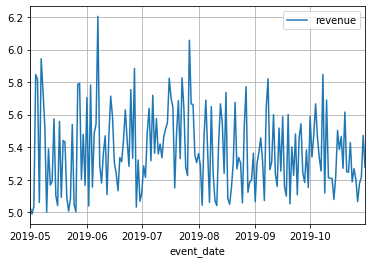

In [68]:
sales_day.plot(grid = True)

Как видно из графика, сумма покупок за день очень нестабильна, но примерно около 5,4 все время.

In [69]:
sales_day.mean()

revenue    5.375884
dtype: float64

In [70]:
sales_week = orders.groupby('event_week').agg({'revenue': 'mean'}) # на сколько покупают в неделю
sales_week

,revenue
event_week,
18,5.456981
19,5.389648
20,5.286034
21,5.162030
22,5.447230
23,5.530434
24,5.437776
25,5.370992
26,5.384260


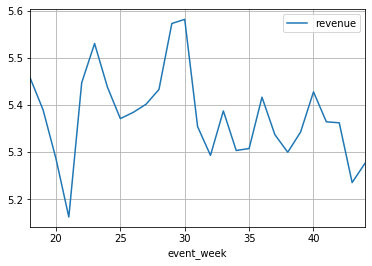

In [71]:
sales_week.plot(grid = True)

Как видно из графика, сумма покупок за неделю очень нестабильно, однако около 5,4 все время.  Кол-во покупок за неделю тоже падает, как мы помним.

In [72]:
sales_week.mean()

revenue    5.376336
dtype: float64

In [73]:
sales_month = orders.groupby('event_month').agg({'revenue': 'mean'}) # на сколько покупают в месяц
sales_month

,revenue
event_month,
5,5.329973
6,5.421179
7,5.489390
8,5.328565
9,5.331163
10,5.344747


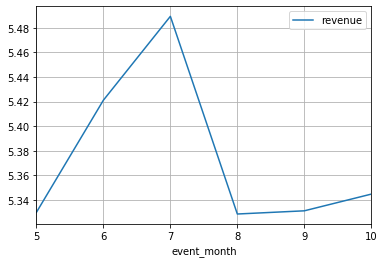

In [74]:
sales_month.plot(grid = True)

Как видно из графика, сумма покупок за месяц сначала растет, потом падает и в конце года идет наверх опять.

In [75]:
sales_month.mean()

revenue    5.374169
dtype: float64

### Вывод
Были посчитаны метрики по направлению продажи.

1) В среднем с момента посещения сайта до покупки проходит 37194 сек =  около 10 часов.

2) Рассчитано среднее число покупок на одного покупателя за день, неделю и месяц. Построены графики  изменения величин во времени.

Среднее кол-во покупок за день 1, за неделю 1,3, за месяц 2,2.

3) Рассчитан средний чек за день, неделю и месяц. Построены графики изменения величин во времени.

Средняя сумма покупок за день 5,4, за неделю 5,4, за месяц 5,4.

### Маркетинг:

- Сколько денег потратили? Всего / на каждый источник / по времени

In [76]:
costs['costs'].sum()

105497.30000000002

In [77]:
sourse = costs.groupby('channel').agg({'costs':'sum'})
sourse['%'] = sourse['costs'] / sourse['costs'].sum() * 100
sourse.sort_values(by = '%', ascending = False) # распред трат по источникам

,costs,%
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


Больше всего трат на рекламу с источником TipTop - 52 % всех трат, FaceBoom - 31 %. Из FaceBoom, как мы помним, приходит больше всего пользователей.

In [78]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [79]:
costs['month'] = costs['dt'].dt.month

In [80]:
spendidng_month = costs.groupby('month').agg({'costs': 'sum'}) # траты рекламы в месяц
spendidng_month

,costs
month,
5,9978.570
6,15090.045
7,16447.060
8,20657.870
9,22441.340
10,20882.415


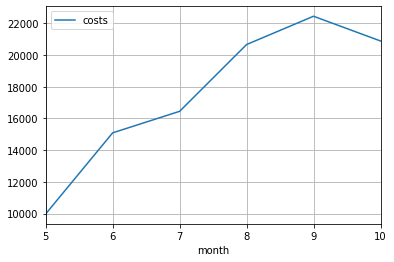

In [81]:
spendidng_month.plot(grid = True)

Траты на рекламу растут с мая по сентябрь, в сентябрь достигают макс значения, и после этого уменьшаются.

- Сколько в среднем стоило привлечение одного пользователя из каждого источника?

In [82]:
profiles.acquisition_cost.mean() # CAC на одного пользователя для всего проекта 

0.7032778251826568

In [83]:
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending = False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

### Вывод
Были посчитаны метрики по направлению маркетинг.

1) Общая сумма расходов на маркетинг 105 497. Выяснено как траты распределены по источникам. Больше всего трат на рекламу с источником TipTop - 52 % всех трат, FaceBoom - 31 %. Из FaceBoom, как мы помним, приходит больше всего пользователей. Визуализировано изменение метрик во времени.

2) Определено сколько в среднем стоило привлечение одного пользователя из каждого источника. Средний CAC на одного пользователя для всего проекта = 0.56. Так же посчитан средний CAC для каждого источника трафика. Результаты представлены в таблице. Самое большое значение среднего САС по источникам приходится на TipTop - 2.25.

# Шаг 4. Задание функции для расчета и анализа LTV, ROI, удержания и конверсии

In [84]:
# удержание

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['dt']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [85]:
# конверсия

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = abs(
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [86]:
# ltv and roi

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = abs(
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

# Шаг 5. Оценить окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализировать общую окупаемость рекламы;
- Проанализироать окупаемость рекламы с разбивкой по устройствам;
- Проанализироать окупаемость рекламы с разбивкой по странам;
- Проанализироать окупаемость рекламы с разбивкой по рекламным каналам.

Описать проблемы, которые были обнаружены. Ответить на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Описать возможные причины обнаруженных проблем и сформировать рекомендации для рекламного отдела. При решении этого шага считать, что смотрю данные 1-го ноября 2019 года и что в организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Анализ общей окупаемости рекламы

In [87]:
profiles2 = profiles.query('channel != "organic"') # искл органиков
profiles2

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,session_year,session_month,session_week,session_date
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019,5,19,2019-05-07
1,4919697,2019-07-09 12:46:00,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,2019,7,28,2019-07-09
3,22593348,2019-08-22 21:35:00,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,2019,8,34,2019-08-22
4,31989216,2019-10-02 00:07:00,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,2019,10,40,2019-10-02
7,46006712,2019-06-30 03:46:00,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000,2019,6,26,2019-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:00,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000,2019,5,21,2019-05-24
150001,999949280903,2019-08-12 06:47:00,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838,2019,8,33,2019-08-12
150003,999956196527,2019-09-28 08:33:00,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000,2019,9,39,2019-09-28
150005,999976332130,2019-07-23 02:57:00,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000,2019,7,30,2019-07-23


In [88]:
profiles2['dt'] = pd.to_datetime(profiles2['dt']).dt.date

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
orders['event_dt'] = pd.to_datetime(orders['event_dt']).dt.date

In [90]:
# рассчитываем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles2, orders, datetime(2019, 10, 1).date(), 14
)

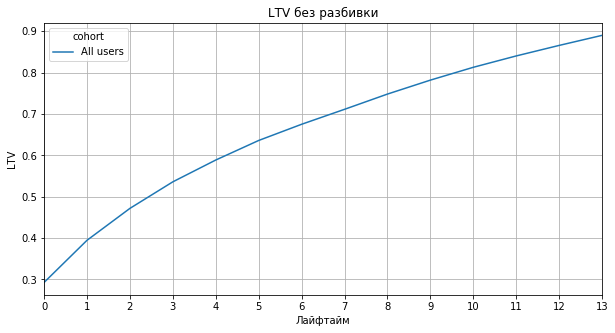

In [91]:
# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV без разбивки')
plt.ylabel('LTV')
plt.xlabel('Лайфтайм')
plt.show()

LTV, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок, растет и это хорошо. Макс значение почи 0.13.

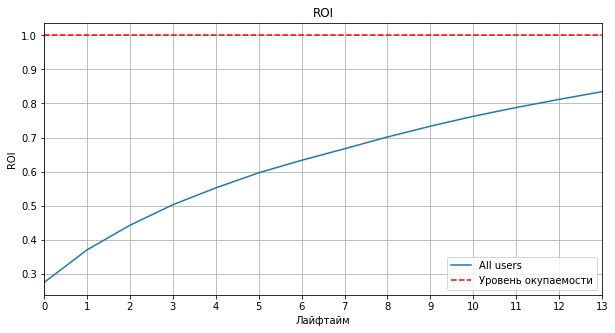

In [92]:
# roi
roi_graph = roi.drop(columns=['cohort_size','cac'])
roi_graph.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('ROI')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

ROI показывает, что клиенты не окупились. К концу второй недели ROI достигает 25 %. Это очень мало.

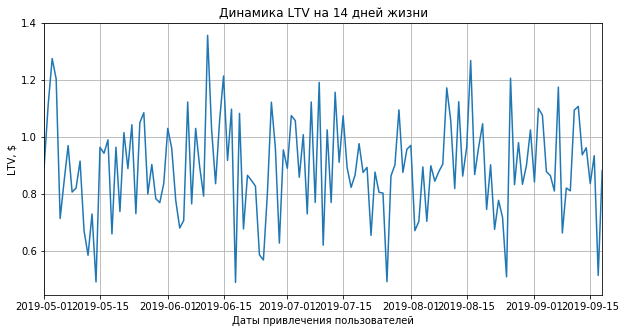

In [93]:
# динамика ltv
report = ltv_history[13]  # делаем срез данных
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика LTV на 14 дней жизни')
plt.ylabel('LTV, $')
plt.xlabel('Даты привлечения пользователей')
plt.show()

LTV в динамике с января по середину апреля равен 0. Видимо клиентов в это время вообще не было или были, но денег приложению не приносили. После середины апреля начался рост и LTV то рос, то падал по "параболе".

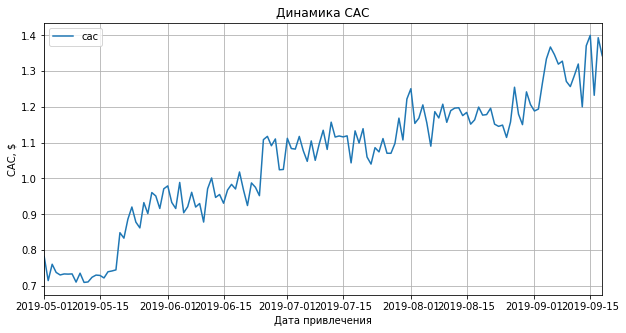

In [94]:
# строим график истории изменений CAC

roi_history.pivot_table(
    index='dt', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС')
plt.show()

Стоимость привлечения одного клиента динамична и растет.

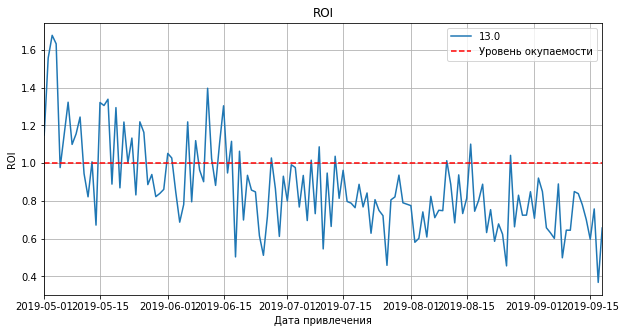

In [95]:
# строим график истории изменения ROI 14 дня
roi_history.pivot_table(
    index='dt',values=13, aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.title('ROI')
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Окупаемость инвестиций окупается только немного в мае, больше не окупается.

### Анализ окупаемости рекламы с разбивкой по устройствам

In [96]:
# рассчитываем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles2, orders, datetime(2019, 10, 1).date(), 14, dimensions=['device']
)

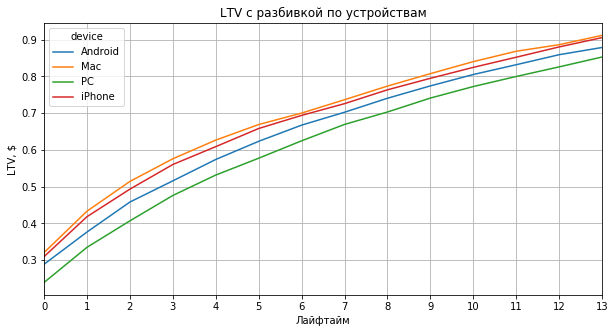

In [97]:
# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по устройствам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

LTV по устройствам растет. Клиенты с Mac приносят больше денег приложению, после Mac идет iPhone. Макс значение почти 0,15.

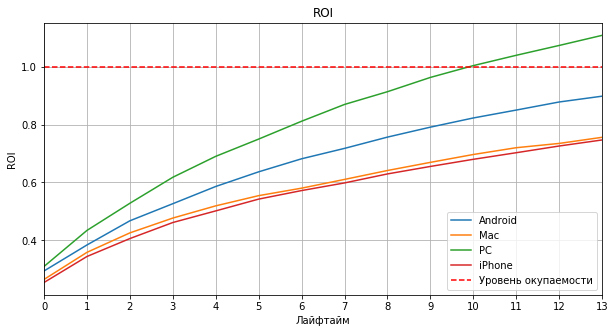

In [98]:
# roi
roi_graph = roi.drop(columns=['cohort_size','cac'])
roi_graph.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('ROI')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

ROI показывает, что клиенты не окупились. К концу второй недели ROI достигает 25 %. Это очень мало. ROI по всем устройствам примерно одинаково.

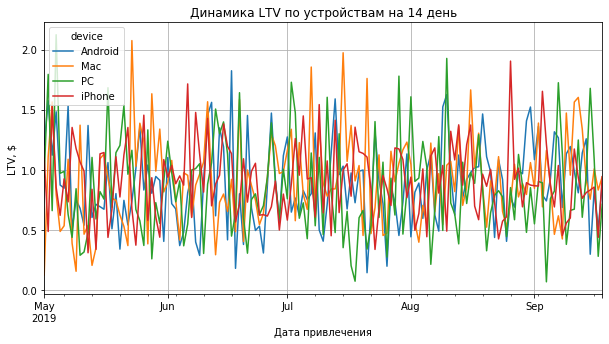

In [99]:
# динамика ltv
ltv_history.pivot_table(
    index='dt', columns='device', values=13, aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('LTV, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика LTV по устройствам на 14 день')
plt.show()

LTV в динамике с января по середину апреля равен 0. Видимо клиентов в это время вообще не было или были, но денег приложению не приносили. После середины апреля начался рост и LTV то рос, то падал. Поведение по всем устройствам примерно одинаковое. Однако клиенты с Mac везде немного выше на графике.

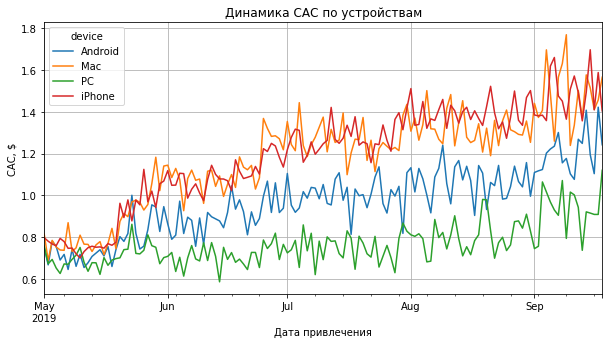

In [100]:
# строим график истории изменений CAC

roi_history.pivot_table(
    index='dt', columns='device', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по устройствам')
plt.show()

Стоимость привлечения одного клиента динамична и растет. Привлечение клиентов с iPhone и Mac обходится дороже, чем клиентов с другими устройсвами.

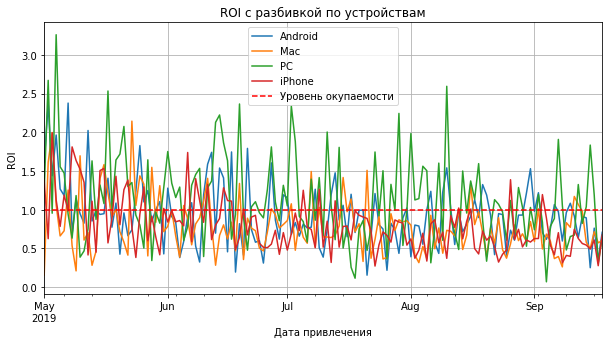

In [101]:
# строим график истории изменения ROI 14 дня
roi_history.pivot_table(
    index='dt',columns='device', values=13, aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.title('ROI с разбивкой по устройствам')
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Окупаемость инвестиций переодичики окупается. По iPhone практически не окупается. По Мас только в мае окупается и в июле.

### Анализ окупаемости рекламы с разбивкой по странам

In [102]:
# рассчитываем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles2, orders, datetime(2019, 10, 1).date(), 14, dimensions=['region']
)

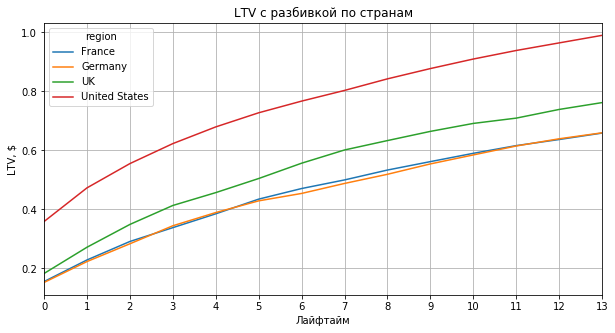

In [103]:
# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по странам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

LTV по странам растет. Клиенты из США приносят больше денег приложению, после США идет Германия. Макс значение 0,16.

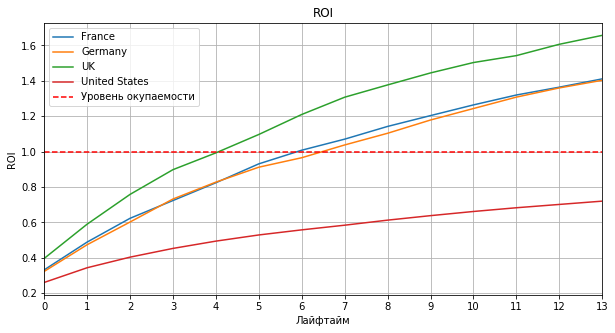

In [104]:
# roi
roi_graph = roi.drop(columns=['cohort_size','cac'])
roi_graph.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('ROI')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

ROI показывает, что клиенты не окупились. К концу второй недели ROI достигает 30 %. Это очень мало. ROI по всем странам примерно одинаково.

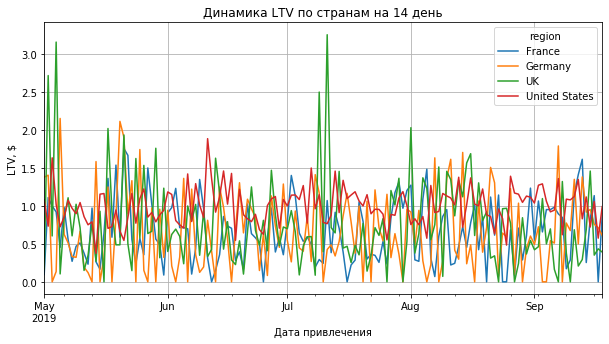

In [105]:
# динамика ltv
ltv_history.pivot_table(
    index='dt', columns='region', values=13, aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('LTV, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика LTV по странам на 14 день')
plt.show()

LTV в динамике с января по середину апреля равен 0. Видимо клиентов в это время вообще не было или были, но денег приложению не приносили. После середины апреля начался рост и LTV то рос, то падал. Клиенты из США приносили больше денег приложению, оданко в сентябре США обогнала Германия.

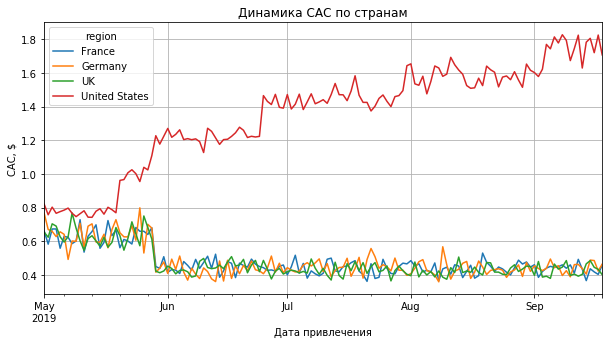

In [106]:
# строим график истории изменений CAC

roi_history.pivot_table(
    index='dt', columns='region', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по странам')
plt.show()

Стоимость привлечения одного клиента динамична и растет. Привлечение клиентов из США обходится дороже примерно в 3 раза.

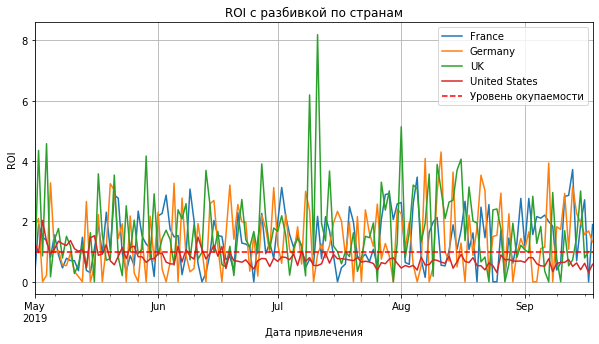

In [107]:
# строим график истории изменения ROI 14 дня
roi_history.pivot_table(
    index='dt',columns='region', values=13, aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.title('ROI с разбивкой по странам')
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Окупаемость инвестиций переодичики окупается. Окупается почти в 4 раза в августе по Германии. Практически не окупается по США.

###  Анализ окупаемости рекламы с разбивкой по рекламным каналам

In [108]:
# рассчитываем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles2, orders, datetime(2019, 10, 1).date(), 14, dimensions=['channel']
)

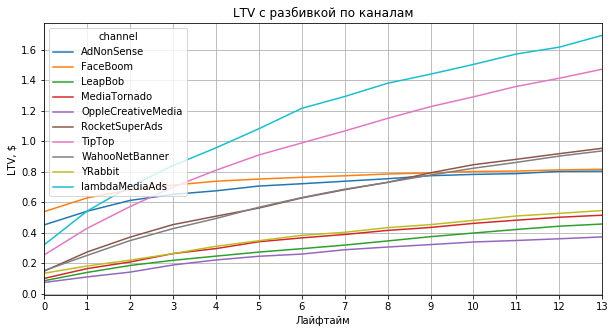

In [109]:
# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по каналам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

LTV по каналам растет. Клиенты из FaceBoom приносят больше денег приложению, после FaceBoom идет AdNoneSence. Макс значение почти 0,5.

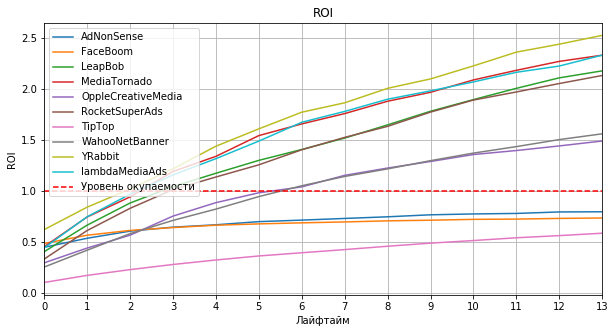

In [110]:
# roi
roi_graph = roi.drop(columns=['cohort_size','cac'])
roi_graph.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('ROI')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

ROI показывает, что клиенты не окупились. К концу второй недели ROI достигает почти 60 % по каналам AdNoneSense, FaceBoom.

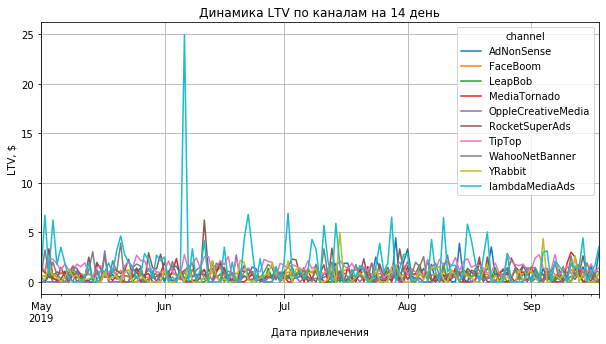

In [111]:
# динамика ltv
ltv_history.pivot_table(
    index='dt', columns='channel', values=13, aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('LTV, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика LTV по каналам на 14 день')
plt.show()

LTV в динамике с января по середину апреля равен 0. Видимо клиентов в это время вообще не было или были, но денег приложению не приносили. После середины апреля начался рост и LTV то рос, то падал. Клиенты из AdNoneSense приносили больше денег приложению, оданко в августе - октябре AdNoneSense стал догонять lambdaMediaAds.

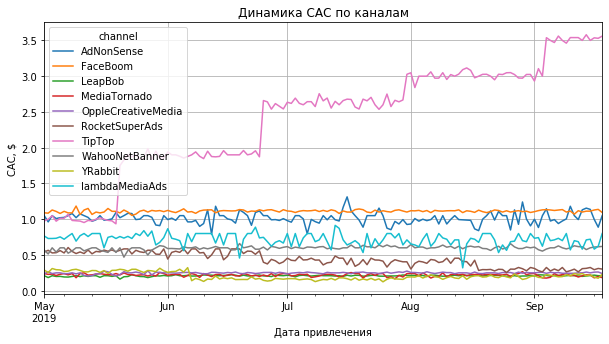

In [112]:
# строим график истории изменений CAC

roi_history.pivot_table(
    index='dt', columns='channel', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам')
plt.show()

Стоимость привлечения одного клиента динамична и растет. Привлечение клиентов из TipTop обходится дороже остальных каналов.

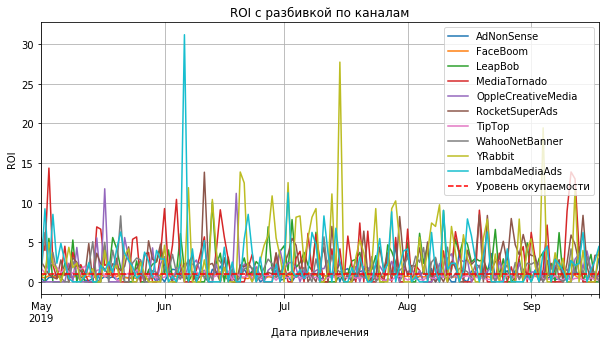

In [113]:
# строим график истории изменения ROI 14 дня
roi_history.pivot_table(
    index='dt',columns='channel', values=13, aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.title('ROI с разбивкой по каналам')
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Окупаемость инвестиций переодичики окупается. Окупается в 11 раз в июле по каналу YRabbit. Практически не окупается по FaceBoom.

### Конверсия

In [114]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles2, orders, datetime(2019, 10, 1).date(), 14
)

Text(0.5, 1.0, 'Конверсия без разбивки')

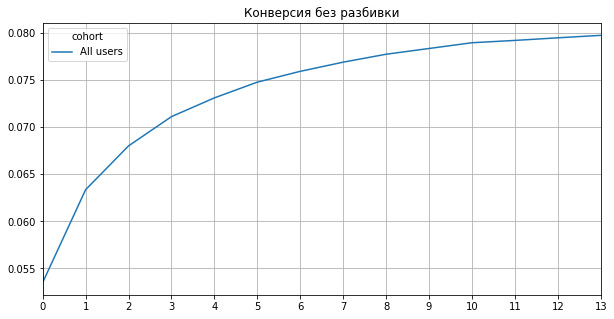

In [115]:
# график конверсии
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('Конверсия без разбивки')

Клиенты постоянно конвертируются и это хорошо.

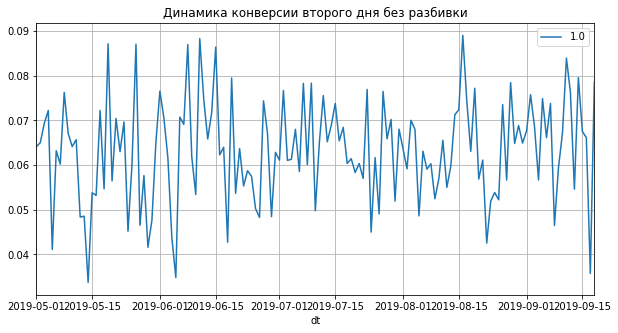

In [116]:
# для графика истории изменений конверсии
# преобразуем таблицу динамики конверсии
report = (
    conversion_history[1]
    .reset_index()
    .pivot_table(index='dt', values=1, aggfunc='mean')
    .fillna(0)  # заполняем пропуски на случай, если они возникнут
)
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика конверсии второго дня без разбивки')
plt.show() 

C января по середину апреля клиенты не конвертируются, так как покупок в это время не было. Потом на второй день клиенты себя ведут, изменяясь по параболе. Конверсия то растет, то падает.

In [117]:
conversion_raw, conversion
conversion_raw, conversion, conversion_history = get_conversion(
    profiles2, orders, datetime(2019, 10, 1).date(), 14, dimensions=['region']
)

Text(0.5, 1.0, 'Конверсия c разбивкой по регионам')

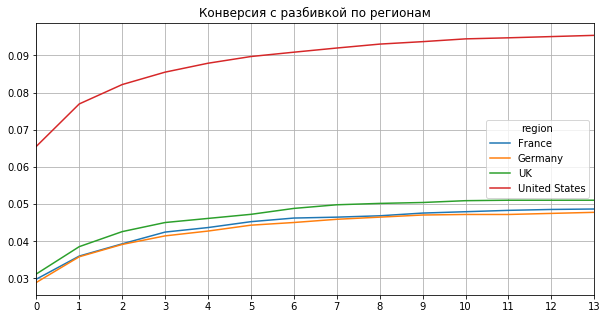

In [118]:
# график конверсии
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('Конверсия c разбивкой по регионам')

Клиенты постоянно конвертируются и это хорошо. Больше всего конвертируются клиенты из США. В других странах поведение клиентов примерно одинаковое.

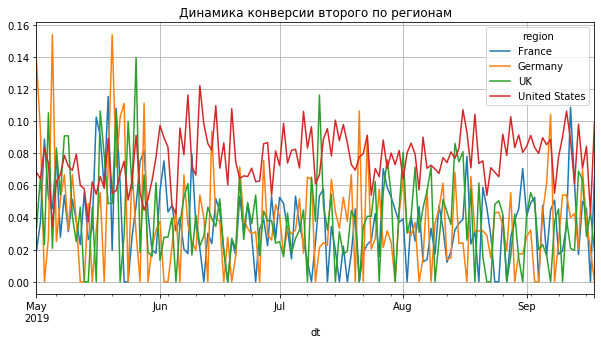

In [119]:
# для графика истории изменений конверсии
# преобразуем таблицу динамики конверсии
report = (
    conversion_history[1]
    .reset_index()
    .pivot_table(index='dt',columns='region', values=1, aggfunc='mean')
    .fillna(0)  # заполняем пропуски на случай, если они возникнут
)
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика конверсии второго по регионам')
plt.show()

C января по середину апреля клиенты не конвертируются, так как покупок в это время не было. Потом на второй день клиенты из США показывают большую конверсию.

In [120]:
conversion_raw, conversion
conversion_raw, conversion, conversion_history = get_conversion(
    profiles2, orders, datetime(2019, 10, 1).date(), 14, dimensions=['channel']
)

Text(0.5, 1.0, 'Конверсия с разбивкой по каналам')

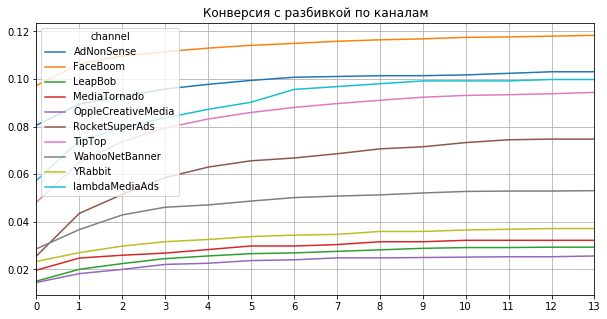

In [121]:
# график конверсии
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('Конверсия с разбивкой по каналам')

Клиенты постоянно конвертируются и это хорошо. Больше всего конвертируются клиенты из AdNoneSense, FaceBoom. В других rканалах поведение клиентов примерно одинаковое.

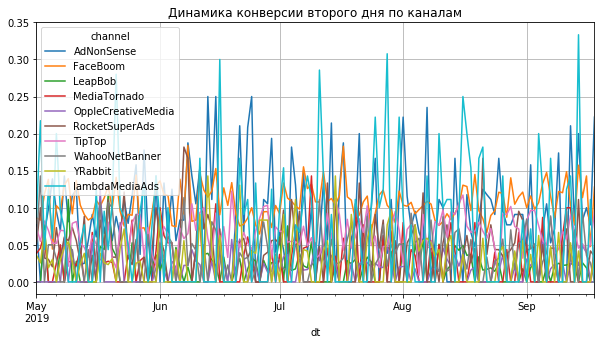

In [122]:
# для графика истории изменений конверсии
# преобразуем таблицу динамики конверсии
report = (
    conversion_history[1]
    .reset_index()
    .pivot_table(index='dt',columns='channel', values=1, aggfunc='mean')
    .fillna(0)  # заполняем пропуски на случай, если они возникнут
)
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика конверсии второго дня по каналам')
plt.show()

C января по середину апреля клиенты не конвертируются, так как покупок в это время не было. Потом на второй день клиенты из AdNoneSense показывают большую конверсию.

In [123]:
conversion_raw, conversion
conversion_raw, conversion, conversion_history = get_conversion(
    profiles2, orders, datetime(2019, 10, 1).date(), 14, dimensions=['device']
)

Text(0.5, 1.0, 'Конверсия с разбивкой по устройствам')

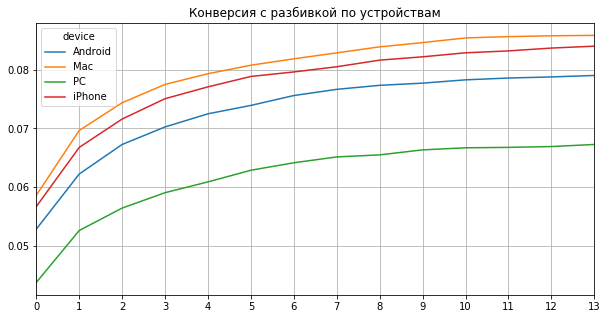

In [124]:
# график конверсии
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('Конверсия с разбивкой по устройствам')

Клиенты постоянно конвертируются и это хорошо. Больше всего конвертируются клиенты с Mac, iPhone.

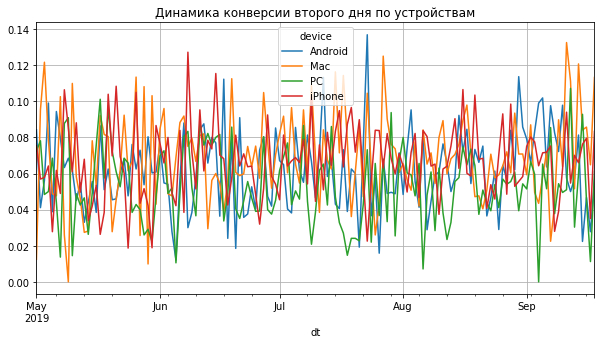

In [125]:
# для графика истории изменений конверсии
# преобразуем таблицу динамики конверсии
report = (
    conversion_history[1]
    .reset_index()
    .pivot_table(index='dt',columns='device', values=1, aggfunc='mean')
    .fillna(0)  # заполняем пропуски на случай, если они возникнут
)
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика конверсии второго дня по устройствам')
plt.show()

C января по середину апреля клиенты не конвертируются, так как покупок в это время не было. Потом на второй день клиенты с Мас и iPhone показывают большую конверсию.

### Удержание

In [126]:
visits['session_start'] = pd.to_datetime(visits['session_start']).dt.date

In [127]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles2, visits, datetime(2019, 10, 1).date(), 14
)

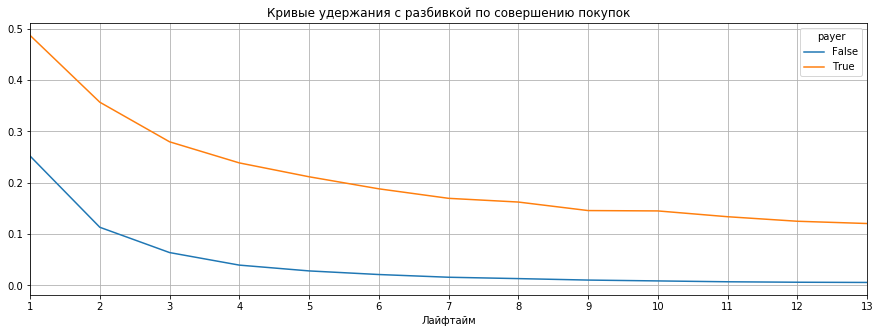

In [128]:
report = retention_grouped.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по совершению покупок')
plt.show()

Удержание платящих клиентов выше, чем неплатящих.

In [129]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles2, visits, datetime(2019, 10, 1).date(), 14, dimensions=['device']
)

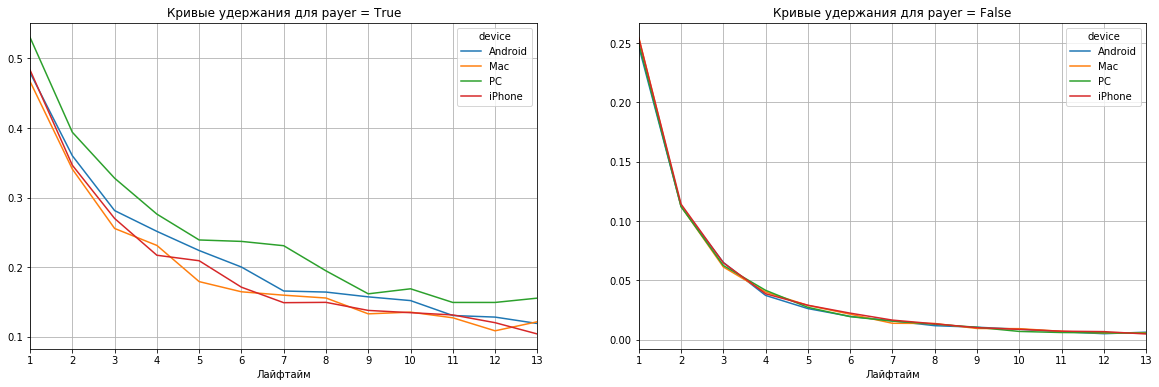

In [130]:
# строим кривые удержания

plt.figure(figsize=(20, 6))  # задаём размер сетки

# исключаем размеры когорт и удержание первого дня
report = retention_grouped.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['payer'].unique()):
    report.query('payer == @payer').droplevel('payer').T.plot(
        grid=True,  # добавляем сетку
        # отметки на оси X — названия колонок
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))

plt.show()

Удержание платящих клиентов немного выше, чем неплатящих.

У неплатящих кривые практически одинаковые, у платящих с iPhone чаще ниже остальных устройств.

In [131]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles2, visits, datetime(2019, 10, 1).date(), 14, dimensions=['channel']
)

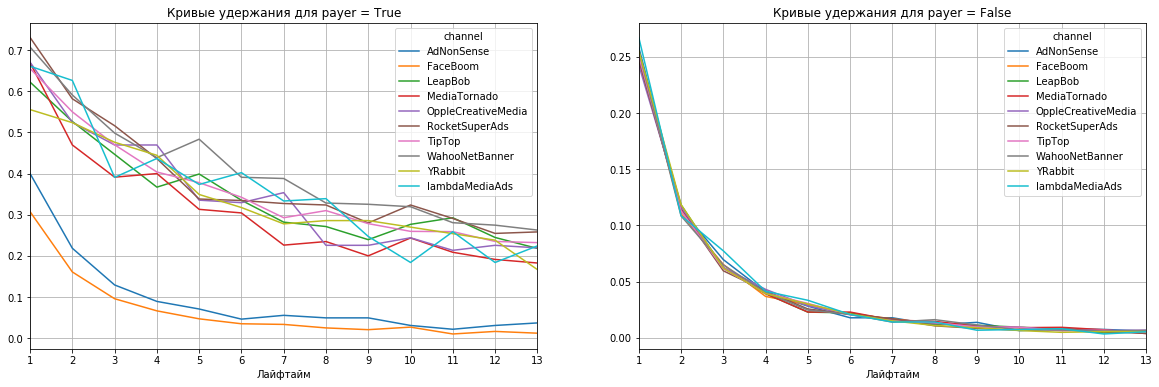

In [132]:
# строим кривые удержания

plt.figure(figsize=(20, 6))  # задаём размер сетки

# исключаем размеры когорт и удержание первого дня
report = retention_grouped.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['payer'].unique()):
    report.query('payer == @payer').droplevel('payer').T.plot(
        grid=True,  # добавляем сетку
        # отметки на оси X — названия колонок
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))

plt.show()

Удержание платящих клиентов немного выше, чем неплатящих.

У неплатящих кривые практически одинаковые, у платящих Больше динамики. 

In [133]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles2, visits, datetime(2019, 10, 1).date(), 14, dimensions=['region']
)

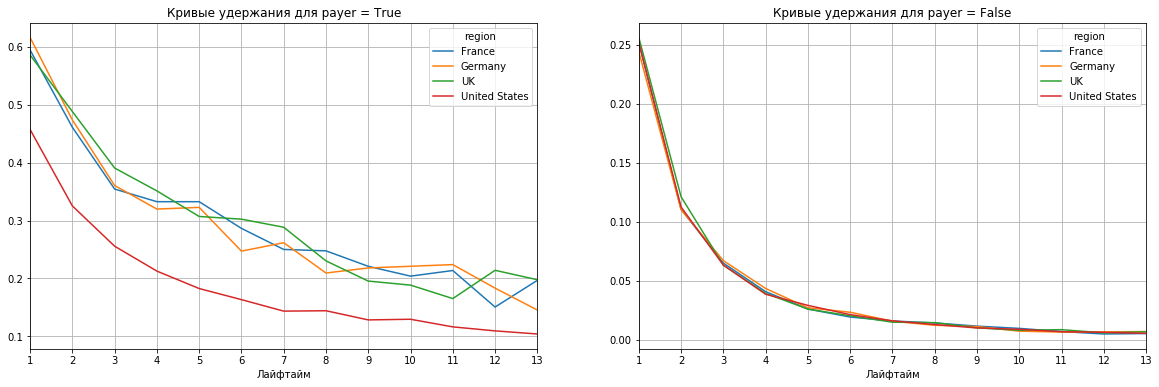

In [134]:
# строим кривые удержания

plt.figure(figsize=(20, 6))  # задаём размер сетки

# исключаем размеры когорт и удержание первого дня
report = retention_grouped.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['payer'].unique()):
    report.query('payer == @payer').droplevel('payer').T.plot(
        grid=True,  # добавляем сетку
        # отметки на оси X — названия колонок
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))

plt.show()

Удержание платящих клиентов немного выше, чем неплатящих.

У неплатящих кривые практически одинаковые, у платящих больше динамики. США чаще хуже остальных стран удерживается.

### Вывод

Были построены графики LTV, ROI, а также графики динамики LTV, CAC и ROI. Так же были построены графики конверсии и удержания с разбивкой по каналам, устройствам и странам. Все графики подписаны соответсвующими комментариями.

### Ответы на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 

ROI не в динамике в целом не окупается, значения всех лайфтаймов ниже границы окупаемости: и общий ROI, и по странам, и по устройствам, и по каналам.

В динамике без разделения немного окупается в мае, по устройствам тоже немного окупается в мае - августе. По странам и по каналам окупается в мае - сентябре.

- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

По iPhone практически не окупается реклама, по странам - это США и по каналам привлечения - FaceBoom.


- Чем могут быть вызваны проблемы окупаемости? 

Конверсия у США выше, чем у остальных стран и  конверсия растет, что является хоршим показателм, оданко США хуже остальных стран удерживается.

Конверсия у канала FaceBoom выше, чем у других каналов, однако из этого канала клиенты удерживаются не так хорошо.

Из устройств по Мас больше всего конверсия, однако клиенты с устройствами из Мас удерживаются не так хорошо.

# Шаг 6. Общие выводы
- Выделение причин неэффективности привлечения пользователей;
- Сформировать рекомендации для отдела маркетинга для повышения эффективности.

В приложение вкладываются огромные деньги в рекламу, а компания терпит убытки. 

Причиной этого служит неокупаемость рекламы. Как видно из графиков вложения в рекламу растут, однако она редко окупается. По каналам, странам, устройствам, у которых конверсия выше у них удержание клиентов ниже. Значит нужно работать над удержанием таких клиентов. Привлекать их покупать что-то в приложении разными акциями, подарками, чтобы они не так быстро отваливались.

Так же клиенты из США, с iPhone, и привлеченные по каналу FaceBoom могут оказывать негативное влияние на окупаемость рекламы. Значит нужно изменить политику взаимодействия с США, клиентами с iPhone и пришедшие из канала FaceBoom. Так как конверсия у них высокая, то не привлекать совсем их нельзя. 

Прекращать рекламные действия по этим секторам не стоит, однако можно работать с этими секторами с помощью другого канала привелчения. Или же договориться с каналом привлечения о так называемом взаимовыгодном предложении. Чтобы клиентов покупать было дешевле.

# Общий вывод по проекту.

Мне, как маркетинговому аналитику развлекательного приложения Procrastinate Pro+ предстояло разобраться почему, несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс.

Со своей задачей я считаю, что справилась.

1) **Был проведен исследовательский анализ данных.** 

Выяснено, что больше всего приходит пользоватлей из США - 78 % всех пользователей, чаще вего пользвуются iPhone - 36 % всех пользователей, источник привлечения чаще всего это FaceBoom - 36 % всех пользователей.

2) **Рассчитаны метрики по трём направлениям: продукт, продажи и маркетинг и построены графики.**

*Продукт*

Средние: dau = 1684, wau = 7186, mau = 18530.
Среднее число сессий в день 1684. 
Одна сессия в среднем длится 1800 сек, что равно 30 минутам. 

*Продажи*

В среднем с момента посещения сайта до покупки проходит около 12 часов.
Среднее кол-во покупок за день 219, за неделю 1141, за месяц 3072.
Средняя сумма покупок за день 17 812, за неделю 121 386, за месяц 546 235.

*Маркетинг*

Общая сумма расходов на маркетинг 105 497. Больше всего трат на рекламу с источником TipTop - 52 % всех трат, FaceBoom - 31 %. 
Средний CAC на одного пользователя для всего проекта = 0.56. Самое большое значение среднего САС по источникам приходится на TipTop - 2.25.

3) **Оценена окупаемость рекламы.**

Были построены графики LTV, ROI, а также графики динамики LTV, CAC и ROI. Так же были построены графики конверсии и удержания с разбивкой по каналам, устройствам и странам. Все графики подписаны комментариями.

4) **Были получены ответы на вопросы по поводу окупаемости рекламы.**

5) **Выявлены причины неэффективности привлечения пользователей.**

6) **Сформулированы рекомендации для отдела маркетинга.**